<a href="https://colab.research.google.com/github/dealtron/Proyek-Akhir-Dicoding/blob/master/Proyek_Akhir_Image_Classification_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir : Image Classification Model Deployment

Nama : Aditya Ramadhan Moesya

Machine Learning - IBM

Disini saya akan mengerjakan tugas terakhir saya di Dicoding pada sertifikasi "Belajar Pengembangan Machine Learning".

# Kriteria Submission
Berikut kriteria submission yang harus saya penuhi:

* Dataset yang akan dipakai bebas, namun minimal memiliki 1000 buah gambar,
* Dataset dibagi menjadi 80% train set dan 20% test set,
* Model harus menggunakan model sequential,
* Model harus menggunakan Conv2D Maxpooling Layer,
* Akurasi pada training dan validation set minimal sebesar 80%,
* Menggunakan Callback,
* Membuat plot terhadap akurasi dan loss model,
* Menulis kode untuk menyimpan model ke dalam format TF-Lite.


# Detail penilaian submission

* Bintang 1 : Semua ketentuan terpenuhi, namun terdapat indikasi plagiat yaitu dengan menggunakan proyek orang lain dan hanya mengubah kontennya saja,
* Bintang 2 : Semua ketentuan terpenuhi, namun penulisan kode berantakan,
* Bintang 3 : Semua ketentuan terpenuhi namun hanya mengikuti seperti apa yang ada pada modul,
* Bintang 4 : Semua ketentuan terpenuhi, dataset memiliki minimal 2000 sampel gambar dan minimal 3 kelas. Serta akurasi pada training dan validation set minimal 85%,
* Bintang 5 : Semua ketentuan terpenuhi, dataset memiliki minimal 10000 gambar, resolusi gambar pada dataset tidak seragam. Serta akurasi pada training set dan validation set minimal 92%.


# Code

## Installing Kaggle and Assigning Dataset

Disini saya akan menginstall kaggle terlebih dahulu untuk mengassign dataset yang akan saya pakai.

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityamoesya","key":"dd22eebf8f3fd60dd55708ef3eec4d51"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

Disini saya menggunakan dataset dari Four Shapes dari kaggle. Yang dimana saya mempunyai tugas untuk melakukan Image Classification terhadap 4 bentuk dari dataset yang saya punya, yaitu bentuk lingkaran, segitiga, segiempat, dan bintang.

In [5]:
! kaggle datasets download -d smeschke/four-shapes

100% 21.6M/21.6M [00:00<00:00, 60.7MB/s]



In [6]:
!ls

four-shapes.zip  kaggle.json  sample_data


In [7]:
!mkdir ic
!unzip four-shapes.zip -d ic
!ls ic

Streaming output truncated to the last 5000 lines.
  inflating: ic/shapes/star/3235.png  
  inflating: ic/shapes/star/3236.png  
  inflating: ic/shapes/star/3237.png  
  inflating: ic/shapes/star/3238.png  
  inflating: ic/shapes/star/3239.png  
  inflating: ic/shapes/star/324.png  
  inflating: ic/shapes/star/3240.png  
  inflating: ic/shapes/star/3241.png  
  inflating: ic/shapes/star/3242.png  
  inflating: ic/shapes/star/3243.png  
  inflating: ic/shapes/star/3244.png  
  inflating: ic/shapes/star/3245.png  
  inflating: ic/shapes/star/3246.png  
  inflating: ic/shapes/star/3247.png  
  inflating: ic/shapes/star/3248.png  
  inflating: ic/shapes/star/3249.png  
  inflating: ic/shapes/star/325.png  
  inflating: ic/shapes/star/3250.png  
  inflating: ic/shapes/star/3251.png  
  inflating: ic/shapes/star/3252.png  
  inflating: ic/shapes/star/3253.png  
  inflating: ic/shapes/star/3254.png  
  inflating: ic/shapes/star/3255.png  
  inflating: ic/shapes/star/3256.png  
  inflating: ic

## Importing Library

Pertama-tama, disini saya akan mengimport library yang akan saya pakai terlebih dahulu.

In [8]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
from google.colab import files
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

## Showing Dataset

In [9]:
os.listdir('ic/shapes')

['square', 'triangle', 'star', 'circle']

Disini saya akan melihat isi dari directory dataset yang akan kita pakai, dan kemudian saya akan memperlihatkan jumlah images dari tiap shape dan satu gambar dari tiap shape-nya.

In [10]:
print('Total Square Shape Images :', len(os.listdir('ic/shapes/square')))
print('Total Triangle Shape Images :', len(os.listdir('ic/shapes/triangle')))
print('Total Star Shape Images :', len(os.listdir('ic/shapes/star')))
print('Total Circle Shape Images :', len(os.listdir('ic/shapes/circle')))

Total Square Shape Images : 3765
Total Triangle Shape Images : 3720
Total Star Shape Images : 3765
Total Circle Shape Images : 3720


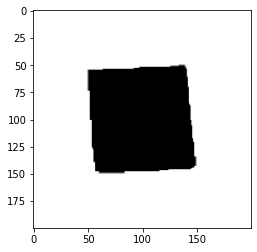

In [11]:
img_sq = image.load_img('ic/shapes/square/0.png')
imgplot_sq = plt.imshow(img_sq)

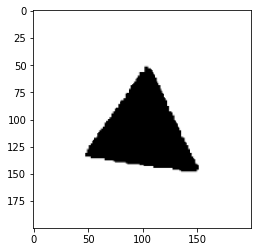

In [12]:
img_tr = image.load_img('ic/shapes/triangle/0.png')
imgplot_tr = plt.imshow(img_tr)

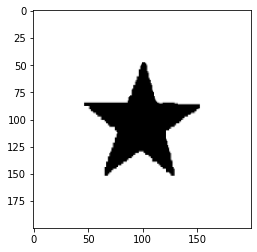

In [13]:
img_st = image.load_img('ic/shapes/star/0.png')
imgplot_st = plt.imshow(img_st)

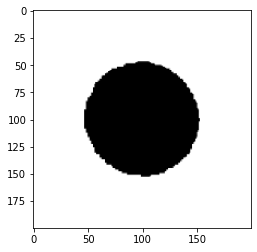

In [14]:
img_ci = image.load_img('ic/shapes/circle/0.png')
imgplot_ci = plt.imshow(img_ci)

Dari sini kita dapat melihat bahwa terdapat **14970 gambar** yang saya pakai sebagai dataset saya

## Assigning Datagen and Image Classification

Disini saya akan menggunakan ImageDataGenerator dan melakukan assign terhadap train dan validation generatornya. Disini saya menggunakan batch size sebesar 32 untuk train dan validation generatornya, dan size 100x100 karena itu adalah versi 1/2 kalinya dari ukuran asli foto dataset, yaitu 200x200. Dan juga, validation split yang saya pakai adalah sesuai kriteria submission, yaitu sebesar **20% test set**.

In [122]:
data_dir = 'ic/shapes/'

In [127]:
datagen = ImageDataGenerator(validation_split = 0.2,
                             rescale = None)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation')

Found 11976 images belonging to 4 classes.
Found 2994 images belonging to 4 classes.


Dan disini saya akan membuat model untuk mengklasifikasi model saya. Disini saya menggunakan **model sekuensial** yang mempunyai **Conv2D Maxpooling Layer**.

In [128]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation = 'softmax')])

In [129]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

Disini saya menggunakan **callback**, dimana callback ini berfungsi untuk menghentikan epoch apabila train dan validation accuracy sudah mencapai 98%.

In [130]:
class forCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.98):
      self.model.stop_training = True
      print("\n Great! The accuracy from training and validation set is already reach > 98%.")

Callback = forCallback()

In [131]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 10,
    verbose = 1,
    callbacks=[Callback])

Epoch 1/10
375/375 [==============================] - 176s 469ms/step - loss: 6.1008 - accuracy: 0.9676 - val_loss: 0.0049 - val_accuracy: 0.9977
Epoch 2/10
375/375 [==============================] - 176s 468ms/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.0045 - val_accuracy: 0.9987

 Great! The accuracy from training and validation set is already reach > 98%.


## Visualizing Model Accuracy

Berikut adalah visualisasi **plot dari loss dan akurasi** model yang saya pakai.

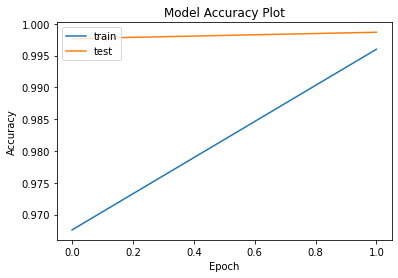

In [132]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

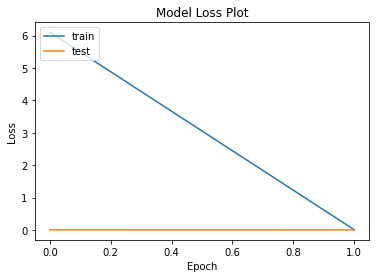

In [133]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Saving Model as tflite**

Dan yang terakhir, disini saya menyimpan model milik saya ke model.tflite agar dapat dideploy nanti.

In [136]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('4shape_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp3ng3kiq5/assets


INFO:tensorflow:Assets written to: /tmp/tmp3ng3kiq5/assets
